### Importing libraries

In [54]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt

from moviepy.editor import *
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import MobileNetV2


## Defining constants

In [55]:
IMAGE_HEIGHT , IMAGE_WIDTH = 128,128
SEQUENCE_LENGTH = 30
DATASET_PATH = "/Users/praksj/Documents/VIT/Year-3/sem 6/Drone/jcomp/working/dataset"

CLASS_LABELS = ["walking", "fights", "running"]

### Frame extractor

In [56]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''

    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)

    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)

    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):

        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)

        # Reading the frame from the video. 
        success, frame = video_reader.read() 

        # Check if Video frame is not successfully read then break the loop
        if not success:
            break

        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()

    # Return the frames list.
    return frames_list

### Data extractor function

In [57]:
def create_dataset():
    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASS_LABELS):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_PATH, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_PATH, class_name, file_name)

            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)

            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:

                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)

    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths


### Creating the dataset

In [58]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: walking
Extracting Data of Class: fights
Extracting Data of Class: running


### adding more data

In [59]:
# land data
land = []
land_label = []
land_path1 = "/Users/praksj/Documents/VIT/Year-3/sem 6/Drone/jcomp/working/dataset/land/highway.mp4"
vid = cv2.VideoCapture(land_path1)
ctr = 0
frame_list = []
# reading images
while True:
    ret, frame = vid.read()
    if not ret:
        print("done")
        break
    else: 
        ctr += 1
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        # Append the normalized frame into the frames list
        frame_list.append(normalized_frame)
        if(ctr == SEQUENCE_LENGTH):
            # sendning frames to model
            f = np.array(frame_list)
            land.append(f)
            land_label.append(3)
            ctr = 0
            frame_list.clear()

land_path2 = "/Users/praksj/Documents/VIT/Year-3/sem 6/Drone/jcomp/working/dataset/land/city-22669.mp4"
vid = cv2.VideoCapture(land_path2)
ctr = 0
frame_list = []
# reading images
while True:
    ret, frame = vid.read()
    if not ret:
        print("done")
        break
    else: 
        ctr += 1
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        # Append the normalized frame into the frames list
        frame_list.append(normalized_frame)
        if(ctr == SEQUENCE_LENGTH):
            # sendning frames to model
            f = np.array(frame_list)
            land.append(f)
            land_label.append(3)
            ctr = 0
            frame_list.clear()
        
# adding running
land_path2 = "/Users/praksj/Documents/VIT/Year-3/sem 6/Drone/jcomp/working/dataset/extra/run.mp4"
vid = cv2.VideoCapture(land_path2)
ctr = 0
frame_list = []
# reading images
while True:
    ret, frame = vid.read()
    if not ret:
        print("done")
        break
    else: 
        ctr += 1
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        # Append the normalized frame into the frames list
        frame_list.append(normalized_frame)
        if(ctr == SEQUENCE_LENGTH):
            # sendning frames to model
            f = np.array(frame_list)
            land.append(f)
            land_label.append(2)
            ctr = 0
            frame_list.clear()
            
# adding walking
land_path2 = "/Users/praksj/Documents/VIT/Year-3/sem 6/Drone/jcomp/working/dataset/extra/walk.mp4"
vid = cv2.VideoCapture(land_path2)
ctr = 0
frame_list = []
# reading images
while True:
    ret, frame = vid.read()
    if not ret:
        print("done")
        break
    else: 
        ctr += 1
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        # Append the normalized frame into the frames list
        frame_list.append(normalized_frame)
        if(ctr == SEQUENCE_LENGTH):
            # sendning frames to model
            f = np.array(frame_list)
            land.append(f)
            land_label.append(0)
            ctr = 0
            frame_list.clear()

done
done
done
done


In [60]:
land = np.array(land)
land.shape

(219, 30, 128, 128, 3)

In [61]:
land_label = np.array(land_label)
land_label.shape

(219,)

In [62]:
features = np.concatenate((features,land), axis = 0)
features.shape

(519, 30, 128, 128, 3)

In [63]:
labels = np.concatenate((labels, land_label),axis = 0)
labels.shape

(519,)

##### classes
walking 0

fighting 1

runnnig 2

land  3

### One hot encoding labels and splitting the data

In [64]:
one_hot_encoded_labels = to_categorical(labels)
# Split the Data into Train ( 75% ) and Test Set ( 25% ).
features_train, features_test, labels_train, labels_test = train_test_split(features, 
                                                                            one_hot_encoded_labels, 
                                                                            test_size = 0.25, 
                                                                            shuffle = True, 
                                                                            random_state = 106)
features = None
labels = None

### Defining Plot function

In [65]:
def plot(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title("Model accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc = "lower right")
    plt.show()
    
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['train', 'val'], loc = "upper right")
    plt.show()
    
    accuracy = round(history.history['accuracy'][-1],4)
    validation_accuracy = round(history.history['val_accuracy'][-1],4)
    return (accuracy, validation_accuracy)

### Creating the MOBILENET + LSTM Architecture

In [66]:
def mobilenet_lstm_model():
    pretrained_model = MobileNetV2(include_top=False,input_shape=(IMAGE_HEIGHT , IMAGE_WIDTH,3),)
    pretrained_model.trainable = False
   
    inp = Input((SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    x = TimeDistributed(pretrained_model)(inp)
    x = TimeDistributed(Flatten())(x)
    x = LSTM(32,return_sequences = True)(x)
    x = LSTM(8)(x)
    out = Dense(4, activation = 'softmax')(x)
    model = Model(inp, out)
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    model.summary()
    return model
    

In [67]:
model = mobilenet_lstm_model()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 30, 128, 128, 3)  0         
                             ]                                   
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 4, 4, 1280)   2257984   
 tributed)                                                       
                                                                 
 time_distributed_5 (TimeDis  (None, 30, 20480)        0         
 tributed)                                                       
                                                                 
 lstm_4 (LSTM)               (None, 30, 32)            2625664   
                                                                 
 lstm_5 (LSTM)               (None, 8)                 1312      
                                                           

### Training the model

In [68]:
hist = model.fit(x = features_train, y = labels_train, epochs = 15, batch_size = 4 , shuffle = True, validation_split = 0.25)

Epoch 1/15


2023-04-08 02:10:10.022705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:10:10.836134: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:10:10.925669: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:10:11.054273: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:10:11.216640: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - ETA: 0s - loss: 1.1402 - accuracy: 0.5395

2023-04-08 02:10:31.989013: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:10:32.709618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:10:32.801435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - 31s 366ms/step - loss: 1.1402 - accuracy: 0.5395 - val_loss: 0.9365 - val_accuracy: 0.8163
Epoch 2/15
73/73 [==============================] - 20s 279ms/step - loss: 0.8136 - accuracy: 0.8419 - val_loss: 0.7159 - val_accuracy: 0.8571
Epoch 3/15
73/73 [==============================] - 19s 266ms/step - loss: 0.5858 - accuracy: 0.8591 - val_loss: 0.4966 - val_accuracy: 0.9184
Epoch 4/15
73/73 [==============================] - 19s 263ms/step - loss: 0.4061 - accuracy: 0.9347 - val_loss: 0.4185 - val_accuracy: 0.9082
Epoch 5/15
73/73 [==============================] - 19s 265ms/step - loss: 0.3490 - accuracy: 0.9107 - val_loss: 0.3762 - val_accuracy: 0.9184
Epoch 6/15
73/73 [==============================] - 19s 267ms/step - loss: 0.2181 - accuracy: 0.9828 - val_loss: 0.6001 - val_accuracy: 0.8469
Epoch 7/15
73/73 [==============================] - 19s 263ms/step - loss: 0.2604 - accuracy: 0.9416 - val_loss: 0.2680 - val_accuracy: 0.8980
Epoch 8/15

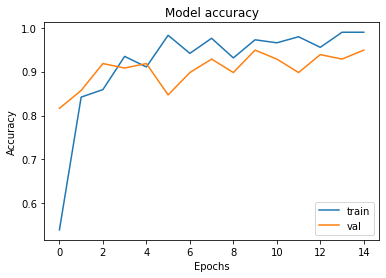

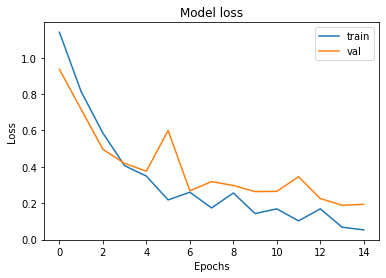

(0.9897, 0.949)

In [69]:
plot(hist)

### Evaluating model

In [70]:
# Calculate Accuracy On Test Dataset
acc = 0
for i in range(len(features_test)):
    predicted_label = np.argmax(model.predict(np.expand_dims(features_test[i],axis =0))[0])
    actual_label = np.argmax(labels_test[i])
    if predicted_label == actual_label:
        acc += 1
acc = (acc * 100)/len(labels_test)
print("Accuracy =",acc)

2023-04-08 02:15:11.453093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 3s 3s/step


2023-04-08 02:15:11.938557: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-04-08 02:15:12.018354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 51ms/step
Accuracy = 99.23076923076923


### Saving Model

In [71]:
# Save your Model.
model.save("new mobilenet.h5")

### References

https://medium.com/mlearning-ai/suspicious-human-activity-detection-95b870dae688

### Drone data

https://pixabay.com/videos/highway-raposo-tavares-brazil-drone-20828/
    
https://pixabay.com/videos/city-architecture-germany-road-22669/